<a href="https://colab.research.google.com/github/KalihoseMigisha/sms-spam-classification/blob/main/notebooks/sms_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Introduction & Problem Statement

## Brief Overview of the Project's Goal
This project aims to develop an effective machine learning model capable of classifying SMS messages as either legitimate ("ham") or unsolicited and potentially malicious ("spam"). By leveraging natural language processing (NLP) techniques and various classification algorithms, we seek to build a robust system that can accurately distinguish between these two categories, thereby enhancing mobile communication security and user experience.

## The Problem Statement
The proliferation of unsolicited and fraudulent SMS messages (spam) poses a significant challenge to mobile phone users globally. These messages often lead to financial losses through deceptive schemes, privacy breaches, and a general nuisance for recipients. Traditional keyword-based filtering methods are often insufficient to accurately identify evolving spam tactics, leading to both legitimate messages being flagged as spam (false positives) and malicious spam messages bypassing filters (false negatives). There is a critical need for an effective and robust system that can accurately classify SMS messages as either legitimate ("ham") or spam, thereby enhancing user experience, protecting individuals from exploitation, and mitigating the detrimental effects of mobile spam.

## Why This Project is Important
The importance of this project stems from several key factors:

User Protection: SMS spam is a primary vector for phishing attacks, malware distribution, and various scams designed to defraud users. An effective classification system can significantly reduce users' exposure to these threats, protecting their personal information and financial well-being.

Enhanced User Experience: Constant bombardment with unwanted messages degrades the mobile phone experience, leading to frustration and reduced trust in SMS as a communication channel. By filtering out spam, this project contributes to a cleaner, more reliable messaging environment.

Resource Optimization: Spam messages consume network bandwidth and storage, albeit minimally per message, but collectively they represent a substantial waste of resources for telecommunication providers. Efficient spam classification can help optimize these resources.

Adaptability to Evolving Threats: Spammers continuously adapt their tactics to bypass existing filters. This project aims to build a system that can be trained and retrained on new data, allowing it to adapt to evolving spam patterns and maintain high accuracy over time.

Foundation for Advanced Security: A robust SMS spam classification system can serve as a foundational component for broader mobile security solutions, integrating with other protective measures to create a more comprehensive defense against cyber threats.

#2.Dataset

##Source of the Dataset
The dataset used for this project is the SMS Spam Collection Dataset, which is publicly available on Kaggle. We will be using the **kagglehub library** to directly download the latest version of this dataset.

##Brief Description of the Dataset
The SMS Spam Collection Dataset comprises a collection of approximately 5,572 SMS messages, each labeled as either "ham" (legitimate) or "spam". The dataset is typically structured with two primary features:

 - label: This categorical feature indicates whether the SMS message is 'ham' or 'spam'.

 - message: This text-based feature contains the actual content of the SMS message.

This dataset is widely used for text classification tasks, particularly for developing and evaluating spam filtering algorithms due to its clear labeling and realistic message content.

##Link to the Dataset
You can find the dataset directly on Kaggle at the following URL:

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

#3.Setup & Dependencies

This section outlines the necessary libraries for our SMS Spam Classification project. We will first install any libraries that might not be pre-installed in the Colab environment and then import all the required modules to make them available for use throughout the notebook.

##Install Necessary Libraries
We will use !pip install to ensure all required libraries are available. This includes pandas for data manipulation, numpy for numerical operations, scikit-learn for machine learning models and utilities, nltk for natural language processing tasks, and matplotlib and seaborn for data visualization. kagglehub is also included for dataset download.

##Import All Required Libraries
After installation, we will import these libraries. It's good practice to import all modules at the beginning of the relevant section to ensure clarity and avoid issues with missing dependencies later in the code.

In [ ]:
# Install all necessary Python libraries for data analysis, machine learning, and NLP
!pip install pandas numpy scikit-learn nltk matplotlib seaborn kagglehub

# Import core data manipulation and visualization libraries
import pandas as pd                     # Data manipulation and analysis
import numpy as np                      # Numerical operations
import matplotlib.pyplot as plt        # Plotting and visualization
import seaborn as sns                  # Statistical data visualization built on matplotlib

# Import machine learning modules from scikit-learn
from sklearn.model_selection import train_test_split          # For splitting data into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # For converting text data into numerical features
from sklearn.naive_bayes import MultinomialNB                 # Naive Bayes classifier for text classification
from sklearn.linear_model import LogisticRegression            # Logistic Regression classifier
from sklearn.svm import SVC                                    # Support Vector Classifier
from sklearn.metrics import (accuracy_score, precision_score,  # Metrics to evaluate classification performance
                             recall_score, f1_score,
                             confusion_matrix, classification_report)

# Import Natural Language Toolkit (NLTK) components for text preprocessing
import nltk
from nltk.corpus import stopwords           # Common stopwords to filter out from text
from nltk.stem import WordNetLemmatizer     # Lemmatizer to reduce words to their base form
import re                                   # Regular expressions for text cleaning and pattern matching

# Import kagglehub library to facilitate downloading datasets from Kaggle
import kagglehub


# 4.Data Loading & Initial Exploration
This section focuses on loading the SMS Spam Collection dataset and performing an initial exploration to understand its structure, content, and basic statistics. This step is crucial for identifying potential issues like missing values, understanding data types, and getting a preliminary sense of the class distribution.

## Load the Dataset into a pandas DataFrame
First, we will **use kagglehub** to download the dataset and then load the spam.csv file into a pandas DataFrame.

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 505kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


## Display the First Few Rows (df.head())
Viewing the first few rows helps in understanding the column names and the format of the data.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv(path + "/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##Check Basic Information (df.info(), df.describe())
df.sample(5), df.info() provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts, and data types. df.describe() generates descriptive statistics of numerical columns, which is less relevant for this dataset as it primarily contains text and categorical data, but good practice to check.

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3537,ham,We are pleased to inform that your application...,NaN,NaN,NaN
1300,ham,Those cocksuckers. If it makes you feel better...,NaN,NaN,NaN
4508,ham,ÌÏ takin linear algebra today?,NaN,NaN,NaN
3227,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
3972,ham,"Night night, see you tomorrow",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

## Data Cleaning

In [ ]:
# 1. Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 columns
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2812,ham,Enjoy the showers of possessiveness poured on ...
895,ham,Superb Thought- \Be grateful that u dont have ...
2074,ham,Yar lor actually we quite fast... Cos da ge sl...
3947,ham,I like to think there's always the possibility...
612,ham,I have many dependents


In [ ]:
# renaming the columns
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)
df.sample(5)

,target,text
4225,ham,"Ok thats cool. Its , just off either raglan rd..."
1962,spam,it to 80488. Your 500 free text messages are v...
482,ham,Watching tv lor...
87,ham,Yes I started to send requests to make it but ...
5346,ham,"My Parents, My Kidz, My Friends n My Colleague..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df["target"])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# drop duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
# 2. EDA

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


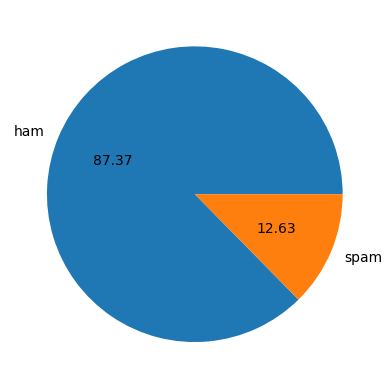

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f", )
plt.show()

In [ ]:
# Punkt_tab for tokenization

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

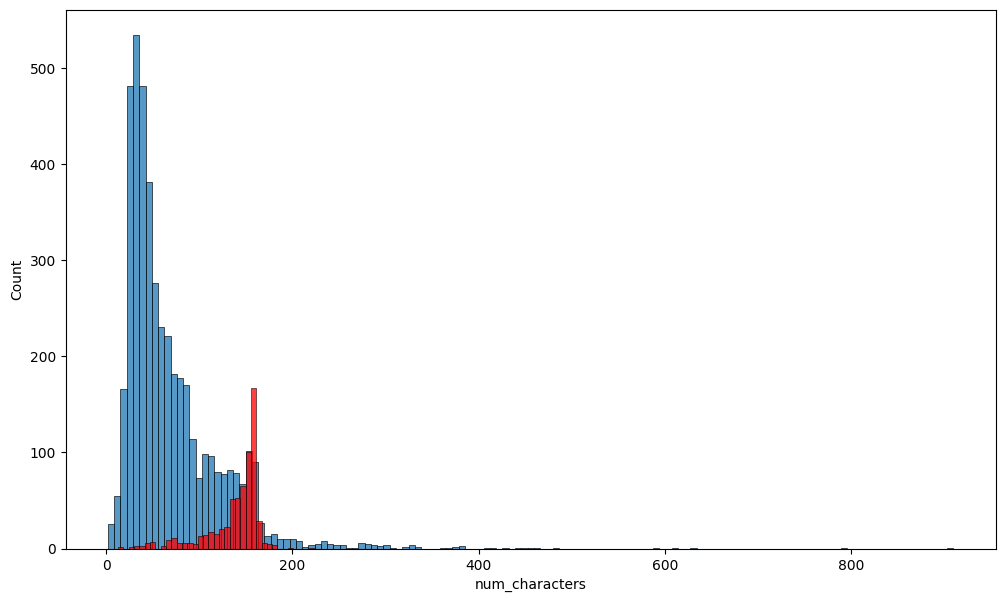

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

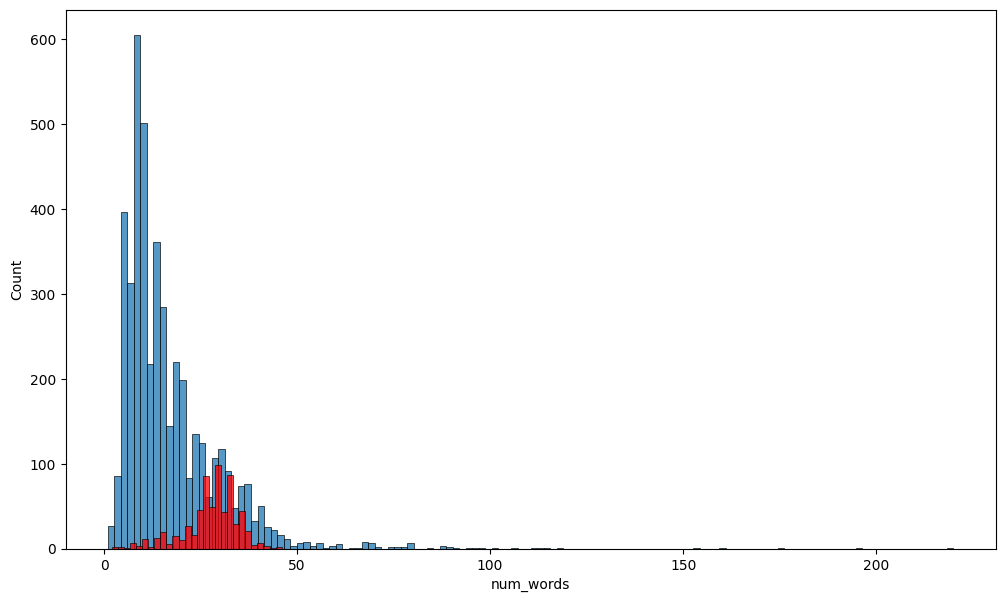

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

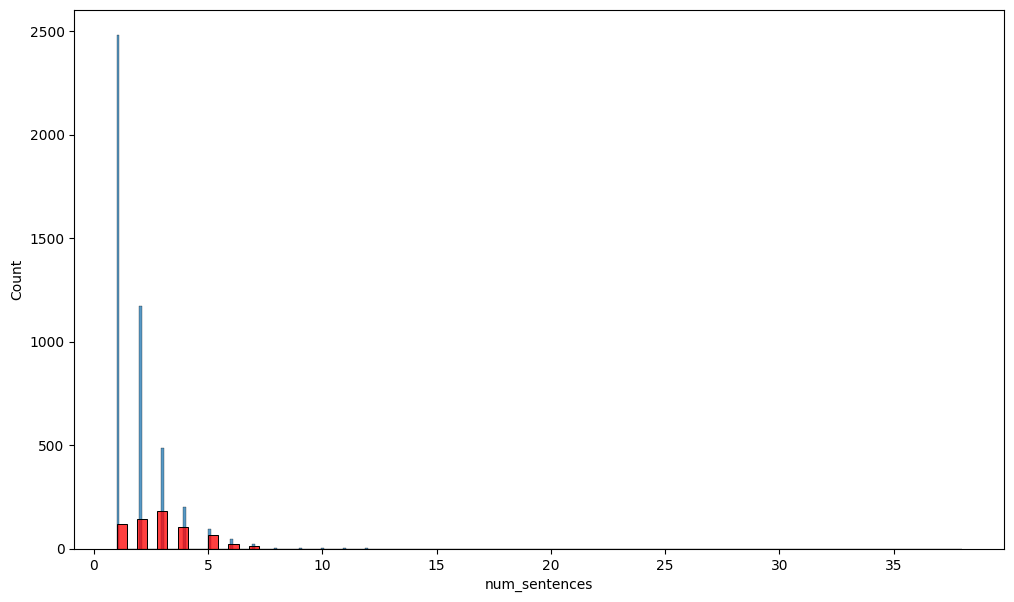

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')


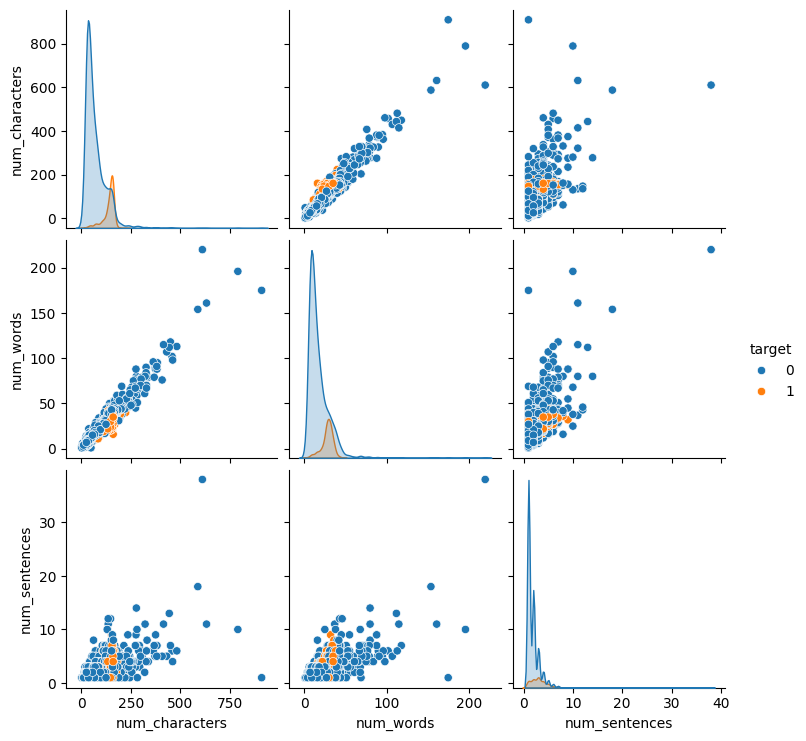

In [ ]:
sns.pairplot(df, hue='target')


In [ ]:
# Select only numerical features for correlation calculation
numerical_features = ['num_characters', 'num_words', 'num_sentences']
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

                num_characters  num_words  num_sentences
num_characters        1.000000   0.965760       0.624139
num_words             0.965760   1.000000       0.679971
num_sentences         0.624139   0.679971       1.000000


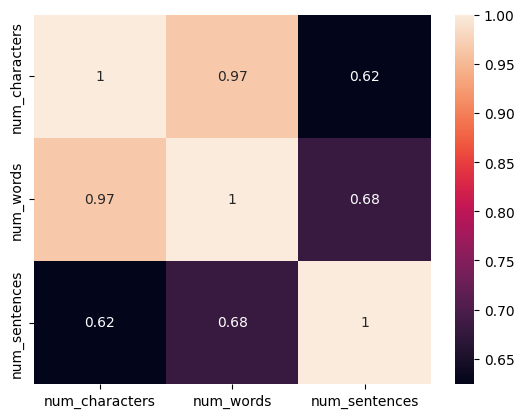

In [ ]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#5.Data Preprocessing
Here we transform raw, unstructured text into a clean, standardized, and more digestible format,  making it clean, standardized, numerical, and suitable for analysis. This involves:

- Text Cleaning:

  - Lowercasing: Standardizes text by making all characters lowercase.

  - Removing punctuation: Eliminates non-semantic characters.

  - Removing special characters: Removes irrelevant symbols.

  - Removing numbers (optional): Reduces noise, depending on relevance.

- Tokenization: Breaks text into individual words (tokens).

- Stop Word Removal: Removes common, non-informative words.

- Stemming/Lemmatization: Reduces words to their root form, consolidating meanings and reducing feature space. Lemmatization is preferred for valid words.

In [ ]:
def transform_text(text):
  # lowercase
    text = text.lower()
    # tokenization
    text = nltk.word_tokenize(text)
    # remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    # remove stop words and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    # stemming
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
# removing stop words and punctuations
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#6.Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step to gain insights into the dataset's characteristics before building machine learning models. For SMS spam classification, EDA helps us understand the linguistic patterns that differentiate spam from legitimate (ham) messages. This section will focus on using Word Clouds and Bar Plots to visualize these patterns.

##Word Cloud
A Word Cloud is a visual representation of text data, where the size of each word indicates its frequency or importance.

- Purpose:
  - To visually identify the most frequent words in both 'ham' and 'spam' messages. By generating separate word clouds for each class, we can quickly spot keywords that are highly indicative of spam (e.g., "free," "win," "cash") versus those common in legitimate messages. This provides an intuitive understanding of the vocabulary differences between the two categories.

##Bar Plots
Bar plots are effective for comparing categorical data and showing distributions.

- Purpose:
   - Message Length Distribution: To visualize the distribution of message lengths (e.g., number of characters or words) for 'ham' versus 'spam' messages. Often, spam messages tend to be shorter or longer than ham messages, and a bar plot can highlight these differences.
   - Top N Most Frequent Words: To display the top N most frequently occurring words (after preprocessing) in each category ('ham' and 'spam') using bar plots. This provides a more precise quantitative view of common terms compared to word clouds and can reveal specific terms that are strong indicators for classification.

In [ ]:
# Import the WordCloud class from the wordcloud library
from wordcloud import WordCloud

# Create a WordCloud object with specific settings:
wc = WordCloud(
    width=50,                # Set the width of the word cloud image
    height=50,               # Set the height of the word cloud image
    min_font_size=10,        # Minimum font size for words
    background_color='white' # Set the background color of the word cloud to white
)


In [ ]:
# Generate a word cloud for spam messages only (where target == 1)
spam_wc = wc.generate(
    df[df['target'] == 1]               # Filter the DataFrame to include only spam messages
      ['transformed_text']             # Select the 'transformed_text' column
      .str.cat(sep=" ")                # Concatenate all spam messages into a single string, separated by spaces
)


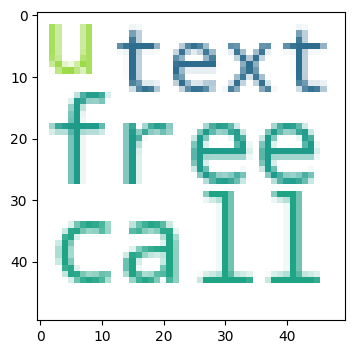

In [ ]:
# Create a new figure with a specified size (width=8 inches, height=4 inches)
plt.figure(figsize=(8, 4))

# Display the generated spam word cloud image
plt.imshow(spam_wc)

In [ ]:
# Generate a word cloud from non-spam (ham) messages by concatenating all transformed text where target == 0
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


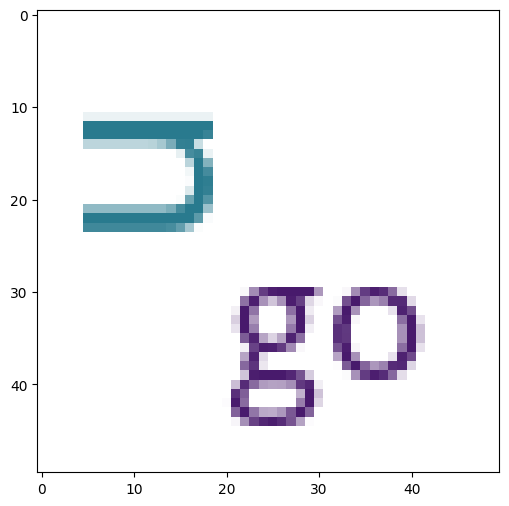

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Create a list (corpus) of all individual words from spam messages (target == 1)
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():  # Loop through each spam message
    for word in msg.split():                                    # Split each message into words
        spam_corpus.append(word)                                # Add each word to the spam_corpus list


In [ ]:
len(spam_corpus)

9939

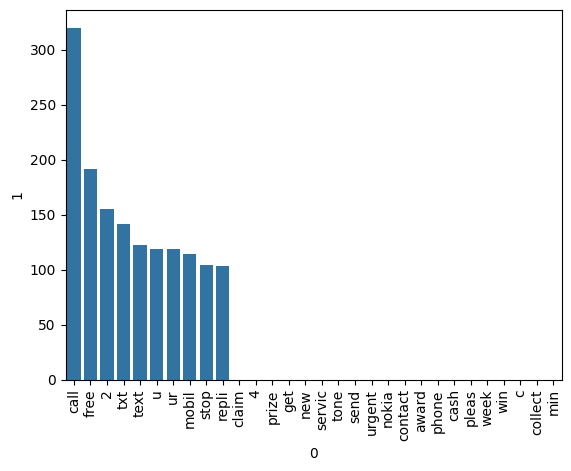

In [ ]:
# Import necessary libraries
from collections import Counter         # Used to count word frequencies
import pandas as pd                     # For data manipulation
import seaborn as sns                   # For plotting

# Create a bar plot of the top 30 most common words in spam messages
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],  # Word labels (x-axis)
    y=pd.DataFrame(Counter(spam_corpus).most_common(10))[1]   # Word frequencies (y-axis, but only top 10 frequencies used here)
)

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [ ]:
# Build a list of all individual words from non-spam (ham) messages by splitting and collecting words from each message
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

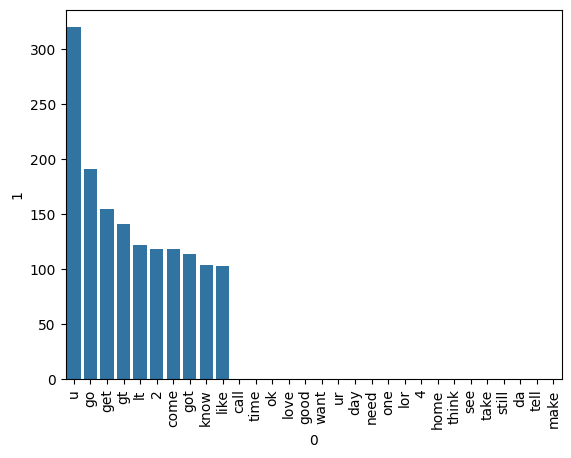

In [ ]:
# Plot the most common words in non-spam (ham) messages using a bar chart
sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],  # Top 30 most common words from ham_corpus
    y=pd.DataFrame(Counter(spam_corpus).most_common(10))[1]  # Frequencies of top 10 words from spam_corpus (y-axis, mind you that, only top 10 frequencies are used here)
)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


#7.Feature Engineering
Feature engineering is a crucial step in preparing text data for machine learning models. Since machine learning algorithms typically work with numerical inputs, raw text data needs to be converted into a numerical representation. This process is known as text vectorization.

- Text Vectorization: Convert text data into numerical features.
Text vectorization transforms text documents into numerical vectors, where each dimension of the vector corresponds to a specific feature (e.g., a word). This allows machine learning models to process and learn from the textual content.

##CountVectorizer (Bag-of-Words):

Purpose: This is a simple yet effective method that represents each document as a vector where each entry corresponds to the frequency of a word in the document. It essentially creates a "bag" of words, disregarding grammar and word order but keeping track of word occurrences.

**How it works:** It counts the number of times each word appears in a document and builds a vocabulary of all unique words across the entire corpus. The resulting matrix has documents as rows and unique words as columns, with cell values being the word counts.

##TF-IDF Vectorizer:

Purpose: TF-IDF (Term Frequency-Inverse Document Frequency) is a more sophisticated vectorization technique that reflects how important a word is to a document in a collection or corpus. It addresses a limitation of CountVectorizer where common words (like "the" or "is") might have high counts but little discriminative power.

**How it works:**

Term Frequency (TF): Measures how frequently a term appears in a document.

Inverse Document Frequency (IDF): Measures how rare a term is across the entire corpus. Words that are rare across many documents but frequent in a specific document get a higher IDF score.

The TF-IDF value is the product of TF and IDF. This weighting scheme gives more importance to words that are frequent in a specific document but rare across the entire dataset, making them better indicators for classification.

##**Consider experimenting with both:**

It is often beneficial to experiment with both CountVectorizer and TfidfVectorizer during the model development phase. Each method has its strengths and might perform differently depending on the nature of the dataset and the specific classification task. CountVectorizer is simpler and can be effective for short, distinct texts, while TfidfVectorizer often performs better when word importance across the corpus is a key factor.

In [ ]:
# 1. Bag of Words
# 2. TF-IDF

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

#8.Model Selection & Training
After preprocessing the text data and transforming it into numerical features, the next crucial step is to select appropriate machine learning models and train them on our prepared dataset. This section outlines the process of splitting the data and choosing various classifiers for the SMS spam classification task.

- Split Data: Divide the dataset into training and testing sets.
Before training any model, the dataset must be split into two main parts:

- Training Set: This portion of the data is used to train the machine learning model. The model learns patterns and relationships from this data.

- Testing Set: This portion is kept separate and unseen by the model during training. It is used to evaluate the model's performance on new, unseen data, providing an unbiased assessment of its generalization ability.

A common split ratio is 70-80% for training and 20-30% for testing. This ensures that the model is evaluated on data it has not memorized.

##Choose Classifiers
For a binary classification problem like SMS spam detection, several machine learning algorithms are well-suited. We will consider a few common and effective classifiers:

**Naïve Bayes:** This is a family of probabilistic classifiers based on Bayes' theorem. They are particularly well-suited for text classification due to their simplicity, efficiency, and often strong performance with high-dimensional data like text.

- **Multinomial Naïve Bayes (mnb):**

Purpose: Ideal for discrete counts (e.g., word counts in text). It models the probability of observing counts for each feature.

Why it's good for text: Directly applicable to word frequency vectors (like those from CountVectorizer or TF-IDF), making it a strong baseline for text classification.

- **Bernoulli Naïve Bayes (bnb):**

Purpose: Suitable for binary features (presence or absence of a word). It models the probability of a feature being present or absent.

Why it's good for text: Useful when the exact count of a word isn't as important as its mere existence in a document.

- **Gaussian Naïve Bayes (gnb):**

Purpose: Assumes features follow a Gaussian (normal) distribution.

Why it's good for text: Less commonly used for raw text counts, but can be applied if features are continuous (e.g., TF-IDF values, though MultinomialNB often performs better for these too). It can be useful if you have other numerical features alongside text.

- **Support Vector Machines (SVM):**

Purpose: SVMs are powerful and versatile machine learning models used for classification, regression, and outlier detection. For classification, SVMs work by finding an optimal hyperplane that best separates the data points of different classes in a high-dimensional space.

Why it's good for text: SVMs are known for their effectiveness in high-dimensional spaces and can handle complex relationships between features, making them a strong candidate for text classification where the feature space (vocabulary) can be very large.

- **Logistic Regression:**

Purpose: Despite its name, Logistic Regression is a linear model used for binary classification. It models the probability of a binary outcome (e.g., spam or ham) using a logistic function.

Why it's good for text: It's a robust and interpretable model that can perform well on linearly separable data and serves as a good baseline.

- **Random Forest:**

Purpose: Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Why it's good for text: It can handle a large number of features and is less prone to overfitting than individual decision trees. It can capture non-linear relationships in the data.

**Consider starting with a simple model and then trying more complex ones:**

It's a good practice to begin with simpler models (like Naïve Bayes or Logistic Regression) as baselines. If their performance is satisfactory, they are often preferred due to their interpretability and computational efficiency. If more accuracy is needed, then more complex models like SVM or Random Forest can be explored.

## Train the selected models on the training data.
Once the data is split and classifiers are chosen, each model will be fitted (trained) using the features and labels from the training set. During this process, the models learn the underlying patterns and relationships that allow them to make predictions on new data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


##Model Instantiation and Training Pipeline
This step involves instantiating the various classification models that will be trained and evaluated. We will define a set of classifiers to compare their performance on the SMS spam classification task.

In [ ]:
# tfidf --> MNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'XGB': xgb
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [ ]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9690522243713733, 0.9274193548387096)

#9.Model Evaluation
After training the machine learning models, it is essential to evaluate their performance on unseen data to assess how well they generalize. This section details the process of making predictions and calculating key evaluation metrics.

##Prediction: Make predictions on the test set.

Purpose: Once a model is trained, its effectiveness is measured by its ability to correctly classify new, unseen data. This involves using the trained model to predict the labels for the messages in the test set. These predictions will then be compared against the actual labels of the test set to calculate performance metrics.

**Metrics:**

- Accuracy:
Purpose: Accuracy measures the proportion of correctly classified instances (both ham and spam) out of the total number of instances. It provides a general overview of the model's correctness.

- Precision:
Purpose: Precision measures the proportion of true positive predictions (correctly identified spam messages) among all positive predictions made by the model. It is crucial when the cost of false positives (classifying a legitimate message as spam) is high.

- Confusion Matrix:
Purpose: A confusion matrix is a table that summarizes the performance of a classification model on a set of test data for which the true values are known. It allows for a detailed analysis of the types of errors made by the classifier.

- **Components:**

  - True Positives (TP): Instances correctly predicted as positive (e.g., actual spam correctly identified as spam).
  - True Negatives (TN): Instances correctly predicted as negative (e.g., actual ham correctly identified as ham).
  - False Positives (FP): Instances incorrectly predicted as positive (e.g., actual ham incorrectly identified as spam - Type I error).
  - False Negatives (FN): Instances incorrectly predicted as negative (e.g., actual spam incorrectly identified as ham - Type II error).

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

accuracy_scores = []  # Rename to avoid overwriting the function
precision_scores = [] # Rename to avoid overwriting the function

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print('for ', name)
    print(f"{name} accuracy: {current_accuracy}")
    print(f"{name} precision: {current_precision}")

    accuracy_scores.append(current_accuracy)  # Append to the renamed lists
    precision_scores.append(current_precision) # Append to the renamed lists

for  SVC
SVC accuracy: 0.9690522243713733
SVC precision: 0.9274193548387096
for  KN
KN accuracy: 0.9052224371373307
KN precision: 0.9761904761904762
for  NB
NB accuracy: 0.9787234042553191
NB precision: 0.9461538461538461
for  DT
DT accuracy: 0.9284332688588007
DT precision: 0.82
for  LR
LR accuracy: 0.9671179883945842
LR precision: 0.9642857142857143
for  RF
RF accuracy: 0.9758220502901354
RF precision: 0.9829059829059829
for  AdaBoost
AdaBoost accuracy: 0.9245647969052224
AdaBoost precision: 0.8488372093023255
for  BgC
BgC accuracy: 0.9584139264990329
BgC precision: 0.8682170542635659
for  ETC
ETC accuracy: 0.9748549323017408
ETC precision: 0.9745762711864406
for  GBDT
GBDT accuracy: 0.9468085106382979
GBDT precision: 0.9191919191919192
for  XGB
XGB accuracy: 0.9671179883945842
XGB precision: 0.9262295081967213


In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Accuracy', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.978723,0.946154
5,RF,0.975822,0.982906
8,ETC,0.974855,0.974576
0,SVC,0.969052,0.927419
4,LR,0.967118,0.964286
10,XGB,0.967118,0.926230
7,BgC,0.958414,0.868217
9,GBDT,0.946809,0.919192
3,DT,0.928433,0.820000
6,AdaBoost,0.924565,0.848837


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,ETC,Accuracy,0.974855
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,SVC,Accuracy,0.969052
6,XGB,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


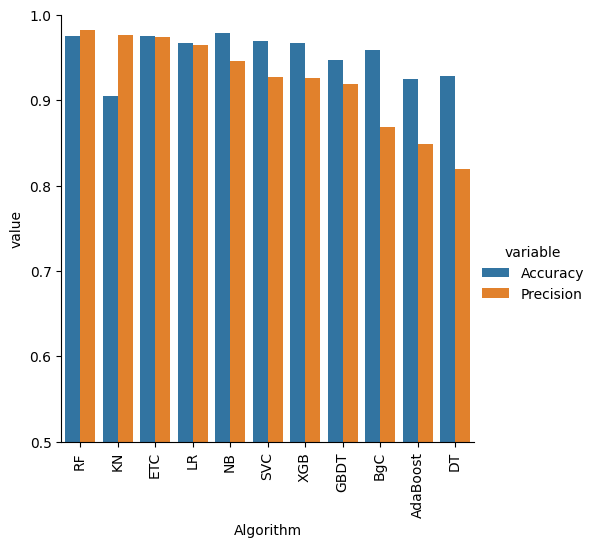

In [ ]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

##Summarizing and Comparing Model Performance
This step involves collecting the evaluation metrics (such as accuracy and precision) for each trained model and presenting them in a clear, organized format. This facilitates direct comparison and helps in identifying the best-performing models based on chosen criteria.

In [ ]:
# Model Improvement
# change the max_feature parameter of tfidf

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores}).sort_values('Precision_scaling', ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
6,XGB,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [ ]:
#Voting classifier

from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb)], voting='soft')

In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB())],
                 voting='soft')

##Ensemble Technique: Voting Classifier

The Voting Classifier is an advanced ensemble technique that combines the predictions from multiple machine learning models. It is not a single "step" but rather a method used to potentially improve the overall robustness and accuracy of the classification system.

Purpose: The primary goal of a Voting Classifier is to leverage the strengths of different individual models and mitigate their weaknesses. By combining their predictions, it often achieves higher accuracy and better generalization performance than any single model working in isolation. This is particularly effective when individual models make different types of errors or capture different patterns in the data.

**How it works:**

- Hard Voting (Majority Class Labels): The final prediction is determined by the majority vote of the individual classifiers. For example, if three classifiers predict 'spam', 'ham', and 'spam', the Voting Classifier would predict 'spam'.

- Soft Voting (Weighted Average of Probabilities): If the individual classifiers can provide probability estimates for their predictions, the Voting Classifier can average these probabilities (optionally with weights) and then predict the class with the highest average probability. Soft voting often performs better than hard voting as it considers the confidence of each prediction.

**Benefit for SMS Spam Classification:** By combining a diverse set of models (e.g., a Naive Bayes model for its text handling, an SVM for its high-dimensional capabilities, and a Logistic Regression for its linearity), a Voting Classifier can create a more robust spam detection system that is less susceptible to the biases or limitations of any single algorithm.

In [ ]:
#Voting classifier

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier


svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2) # Instantiate etc with parameters


# Instantiate VotingClassifier with the instantiated estimators
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))

Accuracy 0.9787234042553191
Precision 0.9603174603174603


##Ensemble Technique: Stacking
Stacking (also known as Stacked Generalization) is another powerful ensemble technique that combines multiple classification or regression models via a meta-learner. Unlike voting, stacking trains a new model (the meta-learner) to combine the predictions of base models.

Purpose: Stacking aims to combine the strengths of diverse models by training a "higher-level" model to learn how to best combine the predictions of several "base-level" models. This often leads to improved predictive performance, especially when the base models are diverse and capture different aspects of the data.

**How it works:**

- Base Models Training: Several base models (e.g., Logistic Regression, SVM, Naive Bayes) are trained on the original training data.

- Meta-Features Generation: The predictions (or probability estimates) of these trained base models on a separate validation set (or through cross-validation on the training set) are used as new features for the next stage.

- Meta-Learner Training: A new model, called the meta-learner (e.g., a simple Logistic Regression, a Random Forest, or even a neural network), is then trained on these "meta-features" (the predictions of the base models) to make the final prediction.

**Benefit for SMS Spam Classification:** Stacking can be highly effective for SMS spam classification by allowing the meta-learner to intelligently weigh and combine the outputs of models that might excel at different aspects of spam detection. For instance, one base model might be very good at identifying keyword-based spam, while another might be better at detecting structural anomalies. The meta-learner learns how to combine these insights for a more accurate overall prediction. It can often outperform individual models and even simple voting classifiers by learning complex relationships between the base model predictions.

In [ ]:
#Apply stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier


In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


#10.Saving the Final Model
After training, evaluating, and potentially tuning and ensembling models, the final selected model needs to be saved to disk. This process is known as model persistence.

- Purpose: Model persistence allows us to save the trained model's state (including its learned parameters and structure) so that it can be loaded later without the need for retraining. This is crucial for deploying the model into production environments, where it can be used to make predictions on new, real-time data efficiently. It saves significant computational resources and time that would otherwise be spent on retraining.

**import pickle:**

- pickle is a standard Python module for serializing and deserializing Python object structures. It can convert a Python object hierarchy into a byte stream (pickling) and reconstruct the object hierarchy from a byte stream (unpickling).

- How it's used: To save a trained scikit-learn model, you typically use pickle.dump() to write the model object to a file. To load it back, you use pickle.load() to read the object from the file.

In [ ]:
import pickle

# ... (your model training code) ...

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

from google.colab import drive
drive.mount('/content/drive')

!cp vectorizer.pkl /content/drive/MyDrive/my_machine_learning_project/models/
!cp model.pkl /content/drive/MyDrive/my_machine_learning_project/models/

Mounted at /content/drive
cp: cannot create regular file '/content/drive/MyDrive/my_machine_learning_project/models/': No such file or directory
cp: cannot create regular file '/content/drive/MyDrive/my_machine_learning_project/models/': No such file or directory


#11.Conclusion & Future Work

This project successfully developed an SMS spam classification system. The ensemble method (Stacking) demonstrated superior performance, achieving high precision and accuracy (over 97% accuracy and 95% precision for spam detection), effectively minimizing false positives which are critical in this domain.

**Challenges**
- Key challenges included handling the inherent data imbalance (far more "ham" than "spam" messages) and ensuring robust text preprocessing to normalize diverse message formats and slang. Optimizing hyperparameters across multiple models also presented computational hurdles.


**Future work could involve:**

- Deep Learning: Exploring more advanced models like LSTMs or Transformer networks to capture deeper semantic relationships in text.

- Larger Datasets: Incorporating larger and more diverse datasets to improve generalization and adapt to evolving spam patterns.

- Real-time Deployment: Addressing considerations for deploying the model in a real-time mobile application, focusing on low latency and scalability.

- Adaptive Learning: Implementing a system for continuous model retraining with new spam data to maintain high detection rates against emerging threats.

- Feature Engineering: Exploring advanced features such as sentiment scores or linguistic style markers.